# Forecasting Stock Prices
**Data Analytics and Big Data Capstone Project 2018c-5 - Data Science with Python**

“`The stock market is designed to transfer money from the active to the patient`.” ― **Warren Buffett**


## Problem Statement

Research associated with the stock market focuses on offering the best tools to the investor to predict the behavior of their product portfolio in search of the best returns; but in a smaller number it addresses the dimensionality and expectations of the new investor.

The common perception of the new investor is that it is highly risky to place their savings in these investment models or that they are beyond their economic capacity.

Variations are instantaneous, but the returns from this type of investment do not occur in the short term. It is important to recognize the pattern of behavior in the medium or long term and to have 'nerves of steel' at the first signs of loss of value of their stock.

Understanding these variations and identifying similar patterns in the past are important, for an investor who wants to be properly advised. Understanding variations is part of informed decision making when investing in the stock market.

To solve this problem, the analysis of 'Time Series' is a tool that makes it easier to forecast the trend or even to forecast the future; this will provide the right investment tool in taking their decisions.

That is why we will experiment with predicting stock prices for a technology-based company using Machine Learning and Deep Learning Techniques. With which we will structure a set of prediction models to help the new investor in taking decisions about the acquisition or sale of its stocks.

The main objective is to show how to implement these algorithms, and to provide a final demonstration with one of the models; the one that provides the best final accuracy metrics and least possible error.

To maximize results and if you have little experience in time series, I suggest to start with the following articles:

- [A comprehensive beginner’s guide to create a Time Series Forecast](https://www.analyticsvidhya.com/blog/2016/02/time-series-forecasting-codes-python/?utm_source=blog&utm_medium=stockmarketpredictionarticle)
- [A Complete Tutorial on Time Series Modeling](https://www.analyticsvidhya.com/blog/2015/12/complete-tutorial-time-series-modeling/?utm_source=blog&utm_medium=stockmarketpredictionarticle)


### Clarify the project goal/scope.

- The `profit or loss calculation is usually determined by the 'Close Price'` of a stock for the day, hence we will **consider the closing price as the target variable**.

- Other data sets offer additional information such as: The attributes 'Dividend', 'Split' and 'Adjusted'. These attributes can then be used for a new research approach using the '**Granger Causality Test**' which is used to find out if one series can predict another series. This research will focus on the values provided by [MacroTrends](https://www.macrotrends.net/stocks/charts/INTC/intel/stock-price-history)

### Set down Evaluation Criteria
** pending **

El historico de datos considerados para esta investigacion preliminar comprenden desde Enero 01 del 2016 hasta la Enero 01 del 2021

### Set down preliminary research hypothesis
** pending **

utilizar registros hitoricos mayores a 10 puede agregar ruido al proceso de prediccion.


## Table of Contents
 1. Setup Work Environment
 2. Exploratory Data Analysis (EDA)
 3. Moving Average [Here](https://towardsdatascience.com/predict-electricity-consumption-using-time-series-analysis-4650284e40aa)
 4. Finding the best model's parameters
 5. Predictions

3. Linear Regression
4. k-Nearest Neighbors
5. Auto ARIMA
6. Prophet
7. Long Short Term Memory (LSTM)

###  1. Setup Work Environment

In [1]:
# Load libraries
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt

from matplotlib.pyplot import rcParams
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.arima_model import ARIMA

# plot within notebook
%matplotlib inline

warnings.filterwarnings('ignore')

In [2]:
## load parameters
# scaler = MinMaxScaler(feature_range=(0, 1))

# set figure size
rcParams['figure.figsize'] = 12, 7

In [3]:
# Load dataset
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m-%d')

# load data
df = pd.read_csv('.\\data\\eod.data-intc.csv') #,  index_col='Date', parse_dates=['Date'], date_parser=dateparse)

# Change all column headings to be lower case, and remove spacing
df.columns = [str(x).lower().replace('_', '') for x in df.columns]

In [4]:
print('\n Shape of the data:\n')
print(df.shape)

print('\n Data\'s Info:\n')
print(df.info())

print('\n First data rows:')
df.head(5)


 Shape of the data:

(10090, 6)

 Data's Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10090 entries, 0 to 10089
Data columns (total 6 columns):
date      10090 non-null object
open      10090 non-null float64
high      10090 non-null float64
low       10090 non-null float64
close     10090 non-null float64
volume    10090 non-null int64
dtypes: float64(4), int64(1), object(1)
memory usage: 473.1+ KB
None

 First data rows:


,date,open,high,low,close,volume
0,3/17/1980,0.3255,0.3307,0.3255,0.3255,10924800
1,3/18/1980,0.3255,0.3281,0.3229,0.3229,17068800
2,3/19/1980,0.3307,0.3359,0.3307,0.3307,18508800
3,3/20/1980,0.3307,0.3346,0.3294,0.3294,11174400
4,3/21/1980,0.3229,0.3229,0.3177,0.3177,12172800


### 2. Exploratory Data Analysis (EDA)

Workspace details [here](https://github.com/erojaso/Forecasting-Stock-Prices/blob/master/01_workspace_stock_price_forecast_eda.ipynb)

The dataset has daily operations at the stock market close, for a total of 10090 observations and 6 attributes.

You should consider that on **Saturdays**, **Sundays** and **Holidays** there are no stock market operations and therefore there are no data for these days.

There are multiple variables in the dataset [Reference](https://www.investopedia.com/):

- Columns '**Open**' and '**Close**' represent the starting and final price at which the stock is traded on a particular day.
- Columns '**High**' and '**Low**' represent the maximum and minimum price of the share for the day.
- Column '**Volume**' reprente number of shares bought or sold in the day.

### 2.1 General view

In [5]:
# setting the index as date
df['date'] = pd.to_datetime(df.date, format='%m/%d/%Y')
df.index = df['date']
df.drop(['date'], axis=1, inplace=True)
df.sort_index(ascending=True, axis=0, inplace=True)

Text(0, 0.5, 'USD')

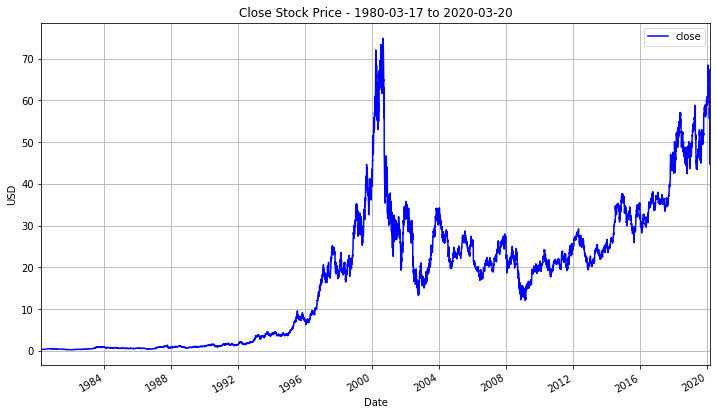

In [6]:
# plot close over time
rcParams['figure.figsize'] = 12, 7
ax = df.plot(y='close', style='b-', grid=True, title='Close Stock Price - 1980-03-17 to 2020-03-20')
ax.set_xlabel("Date")
ax.set_ylabel("USD")

In [7]:
df.describe()

,open,high,low,close,volume
count,10090.000000,10090.000000,10090.000000,10090.000000,1.009000e+04
mean,17.744796,17.988726,17.501696,17.743389,5.175399e+07
std,16.084734,16.313632,15.864770,16.085440,3.555889e+07
min,0.218800,0.218800,0.216100,0.216100,0.000000e+00
25%,1.130200,1.149350,1.117200,1.132800,2.760502e+07
50%,19.260000,19.500000,19.029950,19.250000,4.622693e+07
75%,27.306750,27.617500,26.909750,27.270000,6.631072e+07
max,75.630000,75.810000,73.630000,74.880000,5.677088e+08


The descriptive data view shows a relatively similar 'mean' and 'standard deviation' for the values 'open', ' high', 'low' and 'close'.

For the purposes of this preliminary investigation, the values for 'volume' have a bias that we will deal with right away, meanwhile we will remove this attribute from the data set.

The data set includes observations from 1984 until the present. Values older than 3 years will not be considered in this preliminary investigation. Part of this decision is based on the historical values shown from the origin 1980 until late of 2017. Therefore, observations with more than 3 years will be removed.

Such a detailed study will require time that is not contemplated within the scope of this investigation.

In [8]:
# remove volume attribute
df.drop('volume', axis=1, inplace=True)

In [9]:
# set start and end date range
start_date = dt.datetime(2018, 1, 31)
end_date = dt.datetime(2021, 1, 31)

# get data range by date
df_adj = df.loc[start_date:end_date, ]

In [10]:
print('\n Shape of the data:\n')
print(df_adj.shape)

print('\n Data\'s Info:\n')
print(df_adj.info())

print('\n First data rows:')
df_adj.head(5)


 Shape of the data:

(538, 4)

 Data's Info:

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 538 entries, 2018-01-31 to 2020-03-20
Data columns (total 4 columns):
open     538 non-null float64
high     538 non-null float64
low      538 non-null float64
close    538 non-null float64
dtypes: float64(4)
memory usage: 21.0 KB
None

 First data rows:


,open,high,low,close
date,,,,
2018-01-31,49.230,49.25,47.5600,48.14
2018-02-01,47.695,48.47,47.4500,47.65
2018-02-02,47.320,47.79,46.1000,46.15
2018-02-05,46.350,47.26,44.5000,44.52
2018-02-06,44.020,44.93,43.0302,44.91


In [11]:
df_adj.describe()

,open,high,low,close
count,538.000000,538.000000,538.000000,538.000000
mean,51.373111,51.989972,50.795581,51.392565
std,5.179134,5.152480,5.196410,5.197871
min,43.350000,44.280000,42.040000,42.420000
25%,47.415000,47.996250,46.785000,47.382500
50%,50.510000,51.255000,50.000000,50.730000
75%,54.355000,54.737500,53.800000,54.355000
max,67.630000,69.290000,67.310000,68.470000


The adjustment of the proposed data returns 538 observacions and the 'mean' around 51+/-0.95 and 'standard deviation' of 5+/-0.01. Also the minimum and maximum value changed have been moved for the dependent variable 'Close Price' from: minimum (from 0.21 to 42.42) and maximum (from 74.88 to 68.47).

These could be preliminary clues to a stationary series, the data are clustered, and it is difficult to support this hypothesis.

Text(0, 0.5, 'USD')

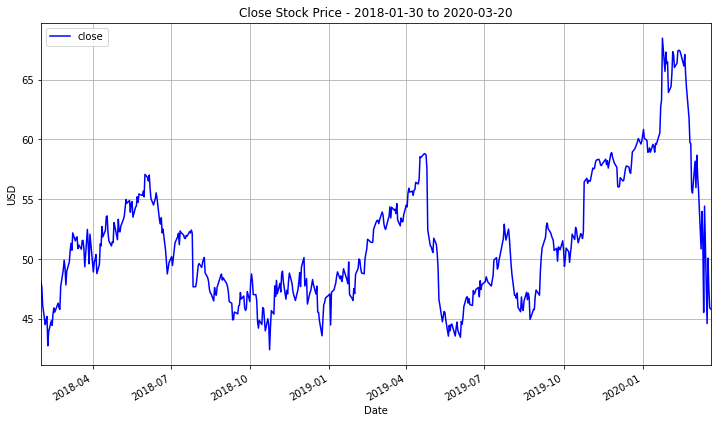

In [12]:
# plot close over time - after adjustments
rcParams['figure.figsize'] = 12, 7
ax = df_adj.plot(y='close', style='b-', grid=True, title='Close Stock Price - 2018-01-30 to 2020-03-20')
ax.set_xlabel("Date")
ax.set_ylabel("USD")

Therefore we need to ensure that our 'is not stationary' series. Under this scenary, we need to have a stationary series to do time series forecasting. In the next stage, we will try to convert this into a stationary series.

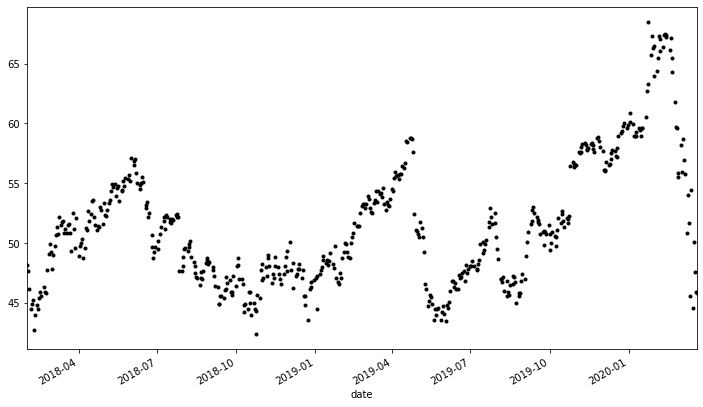

In [13]:
# plot the scatterplot:
rcParams['figure.figsize'] = 12, 7
df_adj.close.plot(style='k.')
plt.show()

We can also visualize the data in our series through a distribution too.

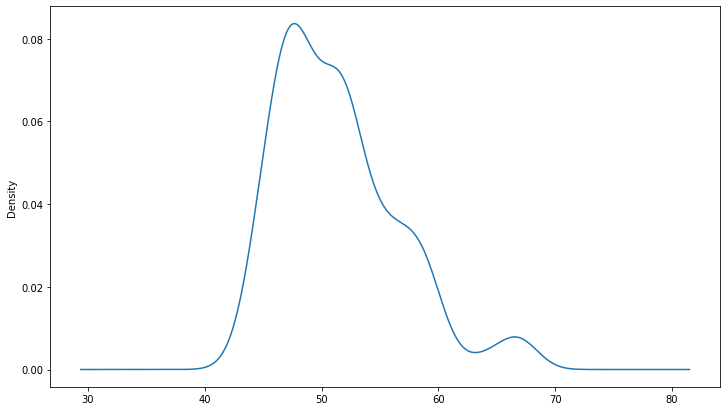

In [14]:
# Distribution of the dataset
rcParams['figure.figsize'] = 12, 7
df_adj.close.plot(kind='kde')

We can observe a distribution close to a normal distribution (bell curve) with a slight bias to its right on the closing values. This will possibly require us to adjust the values during data cleaning.

In order to perform a time series analysis, we may need to separate seasonality and trend from our series. The resultant series will become stationary through this process.

So let us separate Trend and Seasonality from the time series.

### ADF (Augmented Dickey-Fuller) Test

In [19]:
# remove volume attribute
df_adj.drop('open', axis=1, inplace=True)
df_adj.drop('high', axis=1, inplace=True)
df_adj.drop('low', axis=1, inplace=True)

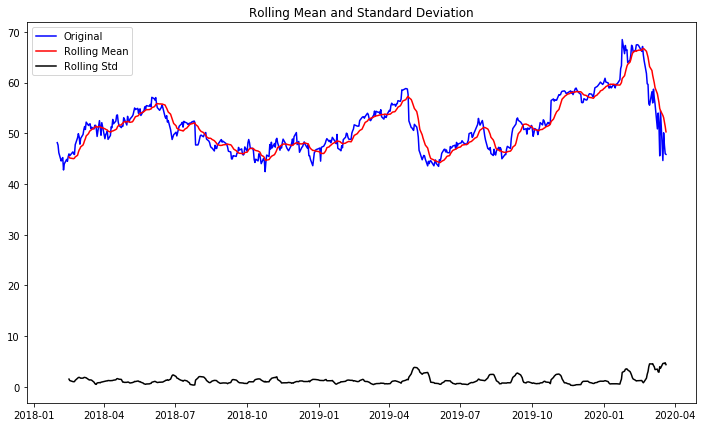

Results of dickey fuller test
Test Statistics                 -3.017741
p-value                          0.033270
No. of lags used                10.000000
Number of observations used    527.000000
critical value (1%)             -3.442820
critical value (5%)             -2.867040
critical value (10%)            -2.569699
dtype: float64


In [21]:
#Test for staionarity
def test_stationarity(timeseries):
    #Determing rolling statistics
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()
    #Plot rolling statistics:
    plt.plot(timeseries, color='blue',label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean and Standard Deviation')
    plt.show(block=False)
    
    print("Results of dickey fuller test")
    adft = adfuller(timeseries,autolag='AIC')
    # output for dft will give us without defining what the values are.
    #hence we manually write what values does it explains using a for loop
    output = pd.Series(adft[0:4],index=['Test Statistics','p-value','No. of lags used','Number of observations used'])
    for key,values in adft[4].items():
        output['critical value (%s)'%key] =  values
    print(output)
    
test_stationarity(df_adj)

<Figure size 864x504 with 0 Axes>

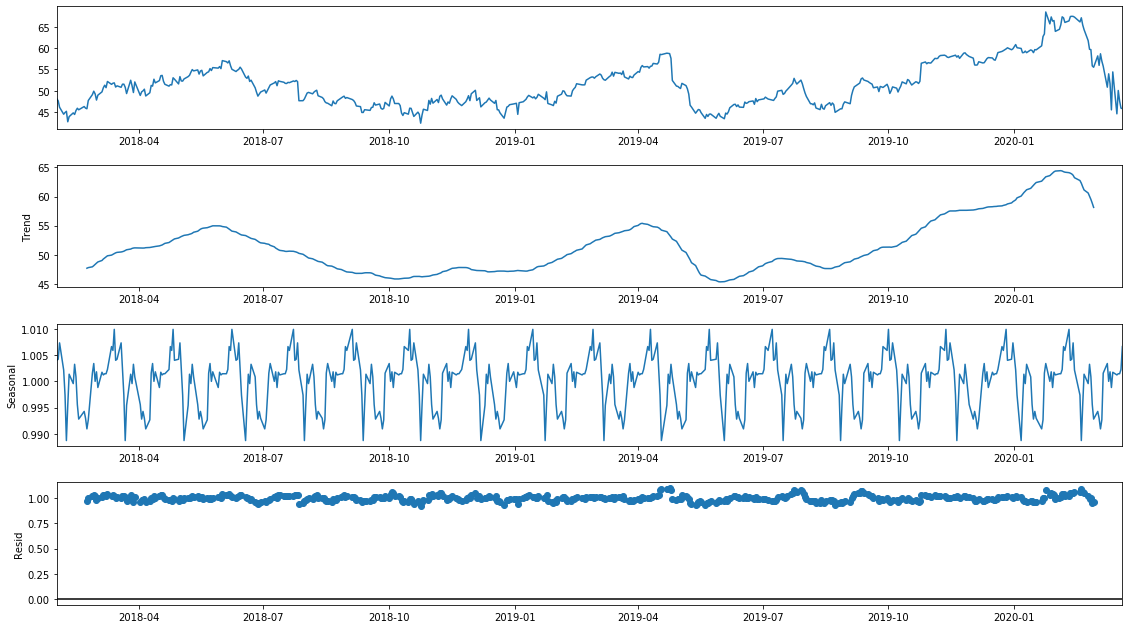

In [23]:
result = seasonal_decompose(df_adj, model='multiplicative', freq = 30)

fig = plt.figure()  
fig = result.plot()  
fig.set_size_inches(16, 9)

No handles with labels found to put in legend.


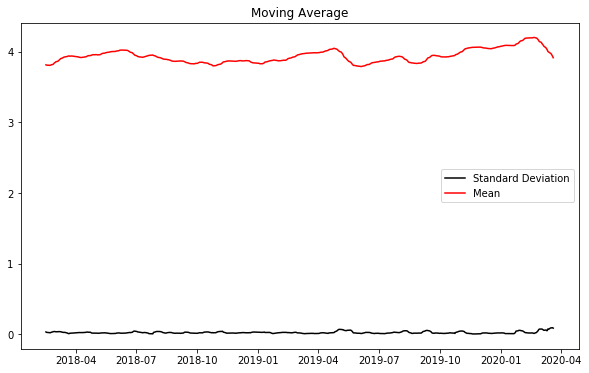

In [24]:
from pylab import rcParams
rcParams['figure.figsize'] = 10, 6

df_log = np.log(df_adj)

moving_avg = df_log.rolling(12).mean()
std_dev = df_log.rolling(12).std()

plt.legend(loc='best')
plt.title('Moving Average')
plt.plot(std_dev, color ="black", label = "Standard Deviation")
plt.plot(moving_avg, color="red", label = "Mean")
plt.legend()
plt.show()

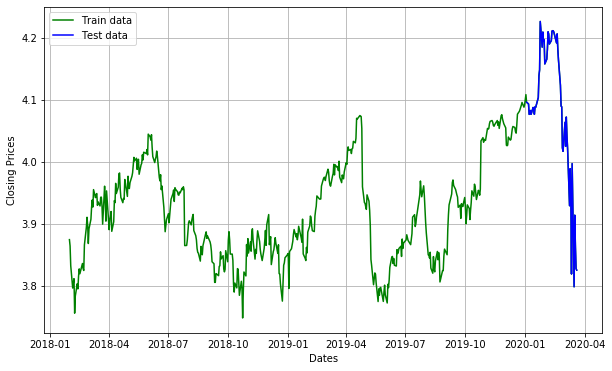

In [25]:
#split data into train and training set
train_data, test_data = df_log[3:int(len(df_log)*0.9)], df_log[int(len(df_log)*0.9):]

plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Closing Prices')
plt.plot(df_log, 'green', label='Train data')
plt.plot(test_data, 'blue', label='Test data')
plt.legend()

In [27]:
# conda install -c alkaline-ml pmdarima 
# restar computer after install
from pmdarima.arima import auto_arima

model_autoARIMA = auto_arima(train_data, 
                             start_p=0, 
                             start_q=0,
                             test='adf',       # use adftest to find optimal 'd'
                             max_p=3, 
                             max_q=3,          # maximum p and q
                             m=1,              # frequency of series
                             d=None,           # let model determine 'd'
                             seasonal=False,   # No Seasonality
                             start_P=0, 
                             D=0, 
                             trace=True,
                             error_action='ignore',  
                             suppress_warnings=True, 
                             stepwise=True)
print(model_autoARIMA.summary())

Performing stepwise search to minimize aic
Fit ARIMA: (0, 1, 0)x(0, 0, 0, 0) (constant=True); AIC=-2449.678, BIC=-2441.331, Time=0.424 seconds
Fit ARIMA: (1, 1, 0)x(0, 0, 0, 0) (constant=True); AIC=-2452.731, BIC=-2440.210, Time=0.187 seconds
Fit ARIMA: (0, 1, 1)x(0, 0, 0, 0) (constant=True); AIC=-2452.607, BIC=-2440.085, Time=0.106 seconds
Fit ARIMA: (0, 1, 0)x(0, 0, 0, 0) (constant=False); AIC=-2451.103, BIC=-2446.929, Time=0.031 seconds
Fit ARIMA: (2, 1, 0)x(0, 0, 0, 0) (constant=True); AIC=-2450.731, BIC=-2434.036, Time=0.094 seconds
Fit ARIMA: (1, 1, 1)x(0, 0, 0, 0) (constant=True); AIC=-2450.726, BIC=-2434.031, Time=0.097 seconds
Fit ARIMA: (2, 1, 1)x(0, 0, 0, 0) (constant=True); AIC=-2448.733, BIC=-2427.864, Time=0.258 seconds
Total fit time: 1.338 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  481
Model:               SARIMAX(1, 1, 0)   Log Likelihood              

So the Auto ARIMA model provided the value of p,d, and q as SARIMAX(3, 1, 0) respectively. Before moving forward, let’s review the residual plots from auto ARIMA.

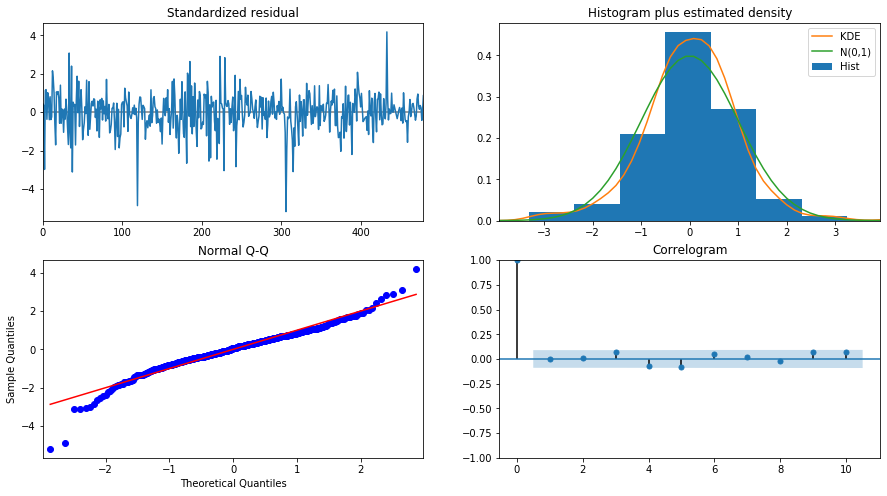

In [28]:
model_autoARIMA.plot_diagnostics(figsize=(15,8))
plt.show()

In [32]:
modelseg = ARIMA(train_data, order=(1, 1, 0))  
fittedseg = modelseg.fit(disp=-1)  
print(fittedseg.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.close   No. Observations:                  480
Model:                 ARIMA(1, 1, 0)   Log Likelihood                1229.366
Method:                       css-mle   S.D. of innovations              0.019
Date:                Wed, 25 Mar 2020   AIC                          -2452.731
Time:                        21:12:03   BIC                          -2440.210
Sample:                             1   HQIC                         -2447.809
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0006      0.001      0.835      0.404      -0.001       0.002
ar.L1.D.close    -0.1023      0.045     -2.254      0.024      -0.191      -0.013
                                    Root

In [37]:
modelseg = ARIMA(train_data, order=(3, 1, 2))  
fittedseg = modelseg.fit(disp=-1)  
print(fittedseg.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.close   No. Observations:                  480
Model:                 ARIMA(3, 1, 2)   Log Likelihood                1235.647
Method:                       css-mle   S.D. of innovations              0.018
Date:                Wed, 25 Mar 2020   AIC                          -2457.295
Time:                        21:14:06   BIC                          -2428.078
Sample:                             1   HQIC                         -2445.811
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0006      0.001      0.822      0.411      -0.001       0.002
ar.L1.D.close    -0.7905      0.060    -13.283      0.000      -0.907      -0.674
ar.L2.D.close    -0.9954      0.058    -

In [39]:
modelseg = ARIMA(train_data, order=(3, 1, 3))  
fittedseg = modelseg.fit(disp=-1)  
print(fittedseg.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.close   No. Observations:                  480
Model:                 ARIMA(3, 1, 3)   Log Likelihood                1235.742
Method:                       css-mle   S.D. of innovations              0.018
Date:                Wed, 25 Mar 2020   AIC                          -2455.484
Time:                        21:14:14   BIC                          -2422.094
Sample:                             1   HQIC                         -2442.359
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0006      0.001      0.817      0.414      -0.001       0.002
ar.L1.D.close    -1.0770      0.604     -1.783      0.075      -2.261       0.107
ar.L2.D.close    -1.2061      0.443     

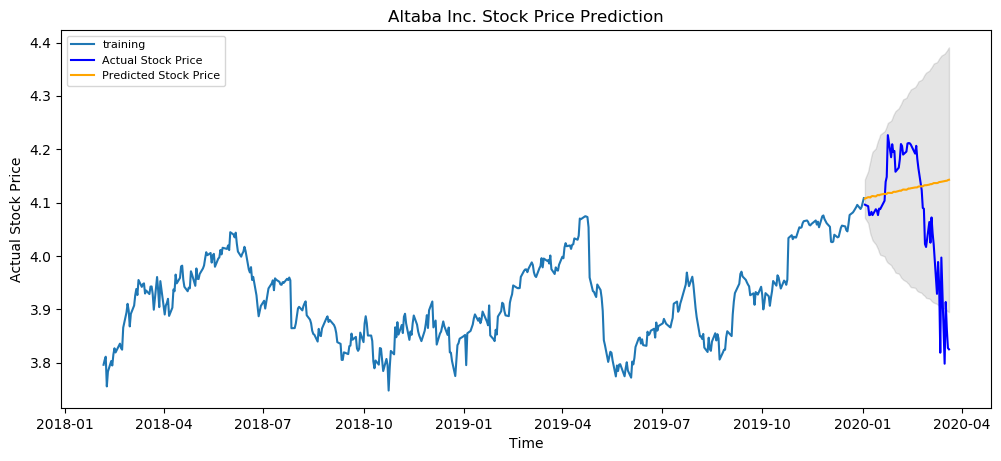

In [40]:
# Forecast
fc, se, conf = fittedseg.forecast(54, alpha=0.05)  # 95% confidence

fc_series = pd.Series(fc, index=test_data.index)

lower_series = pd.Series(conf[:, 0], index=test_data.index)
upper_series = pd.Series(conf[:, 1], index=test_data.index)

plt.figure(figsize=(12,5), dpi=100)
plt.plot(train_data, label='training')
plt.plot(test_data, color = 'blue', label='Actual Stock Price')
plt.plot(fc_series, color = 'orange',label='Predicted Stock Price')
plt.fill_between(lower_series.index, lower_series, upper_series, color='k', alpha=.10)
plt.title('Altaba Inc. Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Actual Stock Price')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [67]:
import math
from sklearn.metrics import mean_squared_error, mean_absolute_error

# report performance
mse = mean_squared_error(test_data, fc)
print('MSE: '+str(mse*100))

mae = mean_absolute_error(test_data, fc)
print('MAE: '+str(mae*100))

rmse = math.sqrt(mean_squared_error(test_data, fc))
print('RMSE: '+str(rmse*100))

mape = np.mean(np.abs(np.array(fc) - np.array(test_data))/np.abs(np.array(test_data)))
print('MAPE: '+str(mape*100))

MSE: 1.5983890563106018
MAE: 9.370554560227479
RMSE: 12.642741222972976
MAPE: 2.291319198688596


In [66]:
100 - (0.022913191986885958 * 100)

97.7086808013114

Around 97.70% **MAPE**([`Mean Absolute Percentage Error`](https://en.wikipedia.org/wiki/Mean_absolute_percentage_error)) implies the model is about 96.5% accurate in predicting the test set observations.